<a href="https://colab.research.google.com/github/Ho-Ngoc-Tai/Wildlife-DeepClassifier/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install numpy pandas matplotlib scikit-learn opencv-python tensorflow


In [5]:
import os
data_path = '/content/drive/MyDrive/zoo_project/dataset'
print(os.listdir(data_path))  # xem có các thư mục con không


['lion', 'tiger', 'monkey', 'elephant']


In [1]:
!nvidia-smi


Mon Nov 10 04:19:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [3]:
!pip install bing-image-downloader
from bing_image_downloader import downloader

# Tải tạm mỗi loài 50 ảnh
animals = ["lion", "tiger", "elephant", "monkey", "zebra"]
for a in animals:
    downloader.download(a, limit=50, output_dir='dataset', adult_filter_off=True)


[%] Downloading Images to /content/dataset/lion


[!!]Indexing page: 1

[%] Indexed 42 Images on Page 1.


[%] Downloading Image #1 from http://upload.wikimedia.org/wikipedia/commons/2/23/African_Lion_3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.pixabay.com/photo/2015/09/22/14/34/african-lion-951779_960_720.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.publicdomainpictures.net/pictures/100000/velka/african-lion.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.publicdomainpictures.net/pictures/160000/velka/lion-dafrique-portrait-sieste.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.publicdomainpictures.net/pictures/40000/velka/lion-1362321306Cfh.jpg
[Error]Invalid image, not saving http://www.publicdomainpictures.net/pictures/40000/velka/lion-1362321306Cfh.jpg

[!] Issue

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [7]:
data_dir = '/content/dataset'
print("Các thư mục (loài động vật):", os.listdir(data_dir))


Các thư mục (loài động vật): ['monkey', 'tiger', 'lion', 'zebra', 'elephant']


In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    subset='validation'
)


Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.2525 - loss: 1.9959 - val_accuracy: 0.2600 - val_loss: 1.6117
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 984ms/step - accuracy: 0.2621 - loss: 1.5894 - val_accuracy: 0.4600 - val_loss: 1.5191
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 875ms/step - accuracy: 0.6129 - loss: 1.4336 - val_accuracy: 0.3600 - val_loss: 1.4791
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5585 - loss: 1.1843 - val_accuracy: 0.4800 - val_loss: 1.4166
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 993ms/step - accuracy: 0.7439 - loss: 0.8623 - val_accuracy: 0.5200 - val_loss: 1.2862
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 974ms/step - accuracy: 0.7450 - loss: 0.7517 - val_accuracy: 0.5800 - val_loss: 1.1689
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8249 - loss: 0.6290 - val_accuracy: 0.5800 - val_loss: 1.2268
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 930ms/step - accuracy: 0.8636 - loss: 0.4644 - val_accuracy: 0.4800 - val_loss: 1.8839


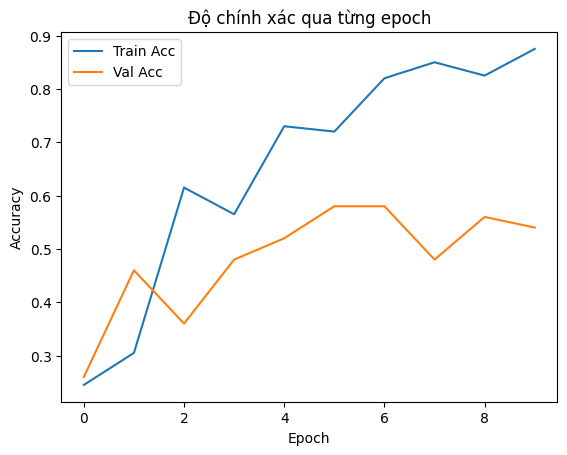

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Độ chính xác qua từng epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [12]:
from tensorflow.keras.preprocessing import image

test_img_path = '/content/dataset/lion/Image_1.jpg'  # đổi thành ảnh thật
img = image.load_img(test_img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_names = list(train_generator.class_indices.keys())

print("Ảnh này được dự đoán là:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step
Ảnh này được dự đoán là: lion


In [13]:
model.save('/content/drive/MyDrive/zoo_project/models/zoo_cnn_model.h5')
